# Introduction to regular expressions

## Dependances

In [6]:
import re
import os 
import sys
from urllib.request import urlopen


In [7]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from bs4 import BeautifulSoup


In [8]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [9]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [10]:
with open("../data/t1.txt") as f:   
    text = f.read()
text

'Russian logistics spacecraft. Progress took the basic Soyuz 7K-T manned ferry designed for the Salyut space station and modified it for unmanned space station resupply. Cargo satellite operated by RKK, Russia. Launched 1978 - 1990.\nAKA: 11F615A15;7K-TG. Status: Operational 1978. First Launch: 1978-01-20. Last Launch: 1990-05-05. Number: 43 . Thrust: 4.09 kN (919 lbf). Gross mass: 7,020 kg (15,470 lb). Unfuelled mass: 6,520 kg (14,370 lb). Specific impulse: 282 s. Height: 7.48 m (24.54 ft).\n\nThe re-entry module was deleted and replaced with a section containing propellant tanks and pumping systems for space station refueling. The orbital module was used to transport dry cargo and water to the station.\n\nSome Progress were launched with a Soyuz Launch Escape System tower. Officially, this was to preserve proven Soyuz aerodynamics. In fact, the tower for these launches included ejection seats planned for use with the Buran spaceplane.\n\nOrbital Storage: 30 days. Habitable Volume: 4.

### from url

In [11]:
# url = "http://astronautix.com/s/salyut.html"
# html = urlopen(url).read()


# text = BeautifulSoup(html, 'html.parser').get_text()
# text[:200]

## Sentence tokenizing:

In [12]:
sentences=sent_tokenize(text)

print(len(sentences))

sentences

21


['Russian logistics spacecraft.',
 'Progress took the basic Soyuz 7K-T manned ferry designed for the Salyut space station and modified it for unmanned space station resupply.',
 'Cargo satellite operated by RKK, Russia.',
 'Launched 1978 - 1990.',
 'AKA: 11F615A15;7K-TG.',
 'Status: Operational 1978.',
 'First Launch: 1978-01-20.',
 'Last Launch: 1990-05-05.',
 'Number: 43 .',
 'Thrust: 4.09 kN (919 lbf).',
 'Gross mass: 7,020 kg (15,470 lb).',
 'Unfuelled mass: 6,520 kg (14,370 lb).',
 'Specific impulse: 282 s. Height: 7.48 m (24.54 ft).',
 'The re-entry module was deleted and replaced with a section containing propellant tanks and pumping systems for space station refueling.',
 'The orbital module was used to transport dry cargo and water to the station.',
 'Some Progress were launched with a Soyuz Launch Escape System tower.',
 'Officially, this was to preserve proven Soyuz aerodynamics.',
 'In fact, the tower for these launches included ejection seats planned for use with the Buran

## Word tokenizing

In [13]:
words=word_tokenize(text)
print(len(words))

print(words)

208
['Russian', 'logistics', 'spacecraft', '.', 'Progress', 'took', 'the', 'basic', 'Soyuz', '7K-T', 'manned', 'ferry', 'designed', 'for', 'the', 'Salyut', 'space', 'station', 'and', 'modified', 'it', 'for', 'unmanned', 'space', 'station', 'resupply', '.', 'Cargo', 'satellite', 'operated', 'by', 'RKK', ',', 'Russia', '.', 'Launched', '1978', '-', '1990', '.', 'AKA', ':', '11F615A15', ';', '7K-TG', '.', 'Status', ':', 'Operational', '1978', '.', 'First', 'Launch', ':', '1978-01-20', '.', 'Last', 'Launch', ':', '1990-05-05', '.', 'Number', ':', '43', '.', 'Thrust', ':', '4.09', 'kN', '(', '919', 'lbf', ')', '.', 'Gross', 'mass', ':', '7,020', 'kg', '(', '15,470', 'lb', ')', '.', 'Unfuelled', 'mass', ':', '6,520', 'kg', '(', '14,370', 'lb', ')', '.', 'Specific', 'impulse', ':', '282', 's.', 'Height', ':', '7.48', 'm', '(', '24.54', 'ft', ')', '.', 'The', 're-entry', 'module', 'was', 'deleted', 'and', 'replaced', 'with', 'a', 'section', 'containing', 'propellant', 'tanks', 'and', 'pumping'

## Find the frequency distribution

In [14]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[('.', 21),
 (':', 13),
 ('the', 5),
 ('for', 5),
 ('(', 5),
 (')', 5),
 ('station', 4),
 ('and', 4),
 ('Soyuz', 3),
 ('space', 3)]

## Plot the frequency graph

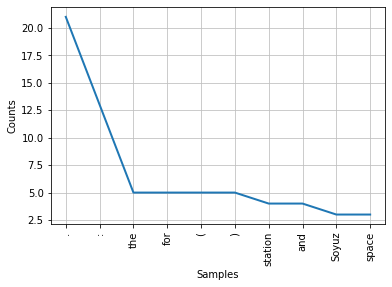

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
import matplotlib.pyplot as plt

fdist.plot(10)

## Remove punctuation marks

In [16]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['Russian', 'logistics', 'spacecraft', 'Progress', 'took', 'the', 'basic', 'Soyuz', 'manned', 'ferry', 'designed', 'for', 'the', 'Salyut', 'space', 'station', 'and', 'modified', 'it', 'for', 'unmanned', 'space', 'station', 'resupply', 'Cargo', 'satellite', 'operated', 'by', 'RKK', 'Russia', 'Launched', 'AKA', 'Status', 'Operational', 'First', 'Launch', 'Last', 'Launch', 'Number', 'Thrust', 'kN', 'lbf', 'Gross', 'mass', 'kg', 'lb', 'Unfuelled', 'mass', 'kg', 'lb']
132


## Plotting graph without punctuation marks

In [17]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('the', 5),
 ('for', 5),
 ('station', 4),
 ('and', 4),
 ('Soyuz', 3),
 ('space', 3),
 ('Launch', 3),
 ('was', 3),
 ('with', 3),
 ('to', 3)]

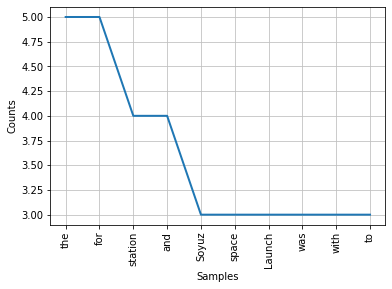

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
fdist.plot(10)

## List of stopwords

In [19]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Removing stopwords

In [20]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['Russian', 'logistics', 'spacecraft', 'Progress', 'took', 'basic', 'Soyuz', 'manned', 'ferry', 'designed', 'Salyut', 'space', 'station', 'modified', 'unmanned', 'space', 'station', 'resupply', 'Cargo', 'satellite', 'operated', 'RKK', 'Russia', 'Launched', 'AKA', 'Status', 'Operational', 'First', 'Launch', 'Last', 'Launch', 'Number', 'Thrust', 'kN', 'lbf', 'Gross', 'mass', 'kg', 'lb', 'Unfuelled', 'mass', 'kg', 'lb', 'Specific', 'impulse', 'Height', 'ft', 'The', 'module', 'deleted', 'replaced', 'section', 'containing', 'propellant', 'tanks', 'pumping', 'systems', 'space', 'station', 'refueling', 'The', 'orbital', 'module', 'used', 'transport', 'dry', 'cargo', 'water', 'station', 'Some', 'Progress', 'launched', 'Soyuz', 'Launch', 'Escape', 'System', 'tower', 'Officially', 'preserve', 'proven', 'Soyuz', 'aerodynamics', 'In', 'fact', 'tower', 'launches', 'included', 'ejection', 'seats', 'planned', 'use', 'Buran', 'spaceplane', 'Orbital', 'Storage', 'days', 'Habitable', 'Volume', 'Spacecra

## Final frequency distribution

In [21]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('station', 4),
 ('Soyuz', 3),
 ('space', 3),
 ('Launch', 3),
 ('Progress', 2),
 ('mass', 2),
 ('kg', 2),
 ('lb', 2),
 ('The', 2),
 ('module', 2)]

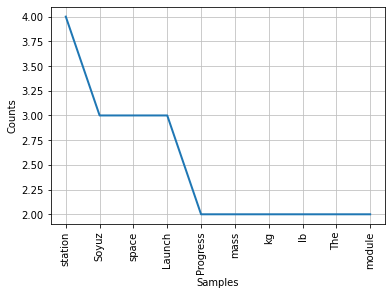

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
fdist.plot(10)

## Word Cloud

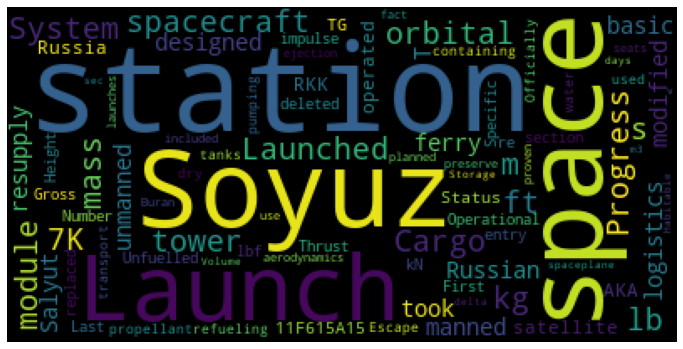

In [23]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [24]:
clean_words_joined=' '.join(clean_words)

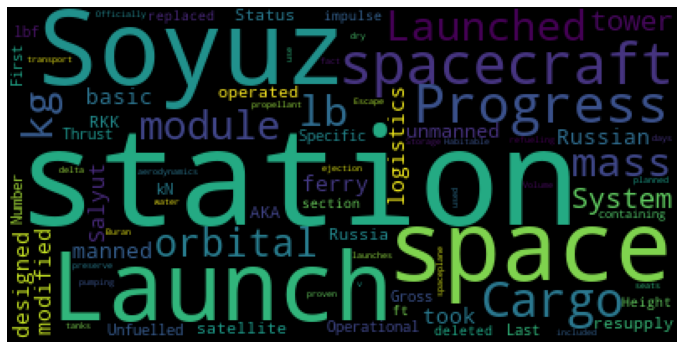

In [25]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

## Stemming

In [ ]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

word_list=['Programming','Programmers','Programmable','orbiter','electrical','studies','leaves','plays','am','is','were']

stemmed_words=[porter.stem(w) for w in word_list]

print(stemmed_words)

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

pos_list=['v','n','a','r']
print(f'word_list--->{word_list}')
for i in pos_list: 
    lemmatized_words=[lemmatizer.lemmatize(w,pos=i) for w in word_list]

    print(f' POS:{i}\n{lemmatized_words}')

## Part of Speech Tagging (PoS tagging)

In [ ]:
tag=nltk.pos_tag(word_list)
print(tag)

In [ ]:
sentence='The three-person EO-3 crew docked with Salyut 7 on 9 February, 1984, and entered the darkened station carrying flashlights.'

# sentence="""Oversee and direct daily test activities at the Cameron Technology Development Center. 
# Lead test lab projects for Drilling and Production systems, R&D testing, product development, product design qualification, performance verification, 
# and product testing/demonstrations. Manage cross-functional team of engineers and technicians for 200+ annual test plans."""

sentence="""The LM while in powered descent is a cross between a helicopter and a spacecraft.
Jim Dowd will pilot the spacecraft."""

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)

tagged_words

## Chunking

In [ ]:
grammar="NP : {<DT>?<JJ>*<NN>} "

parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)

In [ ]:
output.draw()

## Chinking

In [ ]:
grammar=r"""NP : {<.*>+}
}<JJ>+{"""
parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)

In [ ]:
output.draw()

## Named Entity Recognition (NER)

In [ ]:
sentence="""Jim Dowd served in the Mission Control Center as the System Engineering & Integration Office (SE&I) Representative for the Mission Evaluation Room (MER) console."""

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)
N_E_R=nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

In [30]:
N_E_R.draw()

## WordNet

In [ ]:
from nltk.corpus import wordnet



In [ ]:
for words in wordnet.synsets('car'):
    print(f'{words.name()}\n{words.definition()}\n{words.examples()}\n')

    for lemma in words.lemmas():
        print(lemma)
    print('\n')

###  Hypernyms: Hypernyms gives us a more abstract term for a word.

In [ ]:
word=wordnet.synsets('rocket')[0]

print(word.hypernyms())

### Hyponyms: Hyponyms gives us a more specific term for a word.

In [ ]:
word=wordnet.synsets('rocket')[0]

print(word.hyponyms())

In [ ]:
[word.hyponyms()[i].name() for i in range(len(word.hyponyms()))]

### Get a name only

In [ ]:
word=wordnet.synsets('rocket')[0]
print(word.lemmas()[0].name())

### Synonyms.

In [ ]:
synonyms=[]

for words in wordnet.synsets('rocket'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
synonyms

### Antonyms

In [ ]:
antonyms=[]

for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
antonyms

### Synonyms and antonyms

In [ ]:
synonyms=[]
antonyms=[]
for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())


print(f'synonyms:\n{synonyms}\n')
print(f'antonyms:\n{antonyms}\n')

##  Finding the similarity between words

In [ ]:
word1=wordnet.synsets('ship','n')[0]

word2=wordnet.synsets('dog','n')[0]

word1.wup_similarity(word2)


# Bag-of-Words

In [ ]:
from collections import Counter

text=text.lower()
Counter(word_tokenize(text))

Counter(text).most_common(2)
Counter(word_tokenize(text)).most_common(2)

In [ ]:
help(wordcloud)